# Word Clouds & the Value of Simple Visualizations

Since this data contains lot of text so let's use a different kind of Visualization. Data visualizations (like charts, graphs, infographics, and more) give a valuable way to communicate important information at a glance, but what if your raw data is text-based? If you want a stunning visualization format to highlight important textual data points, using a **word cloud** can make dull data sizzle and immediately convey crucial information.

When looking at an in-depth data analysis, it is sometimes difficult to discern which points are the most important?


# Word Cloud in Python

A word cloud is a visually prominent presentation of “keywords” that appear frequently in text data. The rendering of keywords forms a cloud-like color picture, so that you can appreciate the main text data at a glance.

In Python, word cloud can be made with help of wordcloud library.

The core of the wordcloud library is the WordCloud class, and all functions are encapsulated in the WordCloud class. When using, you need to instantiate a WordCloud object, and call its generate(text) method to convert the text into a word cloud.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazoncom-fashion-products/amazon_co-ecommerce_sample.csv


# Reading Dataset

In [7]:
train_df = pd.read_csv("/kaggle/input/amazoncom-fashion-products/amazon_co-ecommerce_sample.csv")
# train_df.head(10)

# Getting summary of Dataset

In [8]:
print(len(train_df))
summary = pd.DataFrame(train_df.dtypes)
summary["null"] = train_df.isnull().sum()
summary["unique"] = train_df.nunique()
summary["first"] = train_df.loc[0]
summary["second"] = train_df.loc[1]
summary["third"] = train_df.loc[2]
summary

10000


,0,null,unique,first,second,third
uniq_id,object,0,10000,eac7efa5dbd3d667f26eb3d3ab504464,b17540ef7e86e461d37f3ae58b7b72ac,348f344247b0c1a935b1223072ef9d8a
product_name,object,0,9964,Hornby 2014 Catalogue,FunkyBuys® Large Christmas Holiday Express Fes...,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...
manufacturer,object,7,2651,Hornby,FunkyBuys,ccf
price,object,1435,2625,£3.42,£16.99,£9.99
number_available_in_stock,object,2500,89,5 new,NaN,2 new
number_of_reviews,object,18,194,15,2,17
number_of_answered_questions,float64,765,19,1.0,1.0,2.0
average_review_rating,object,18,19,4.9 out of 5 stars,4.5 out of 5 stars,3.9 out of 5 stars
amazon_category_and_sub_category,object,690,255,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies > Model Trains & Railway Sets > Rail V...
customers_who_bought_this_item_also_bought,object,1062,8755,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,http://www.amazon.co.uk/Classic-Train-Lights-B...


We can see that total there are 10000 rows in the dataset. All the columns which dataset have ae re of object type.
There are columns with many Null values as we can see that in summary.

In [31]:
train_df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers'],
      dtype='object')

# Getting textual columns

In [50]:
textual_cols = ['product_name', 'manufacturer', 'amazon_category_and_sub_category', 'description',
        'customer_questions_and_answers', 'customer_reviews', 'sellers' ]

# Plotting data

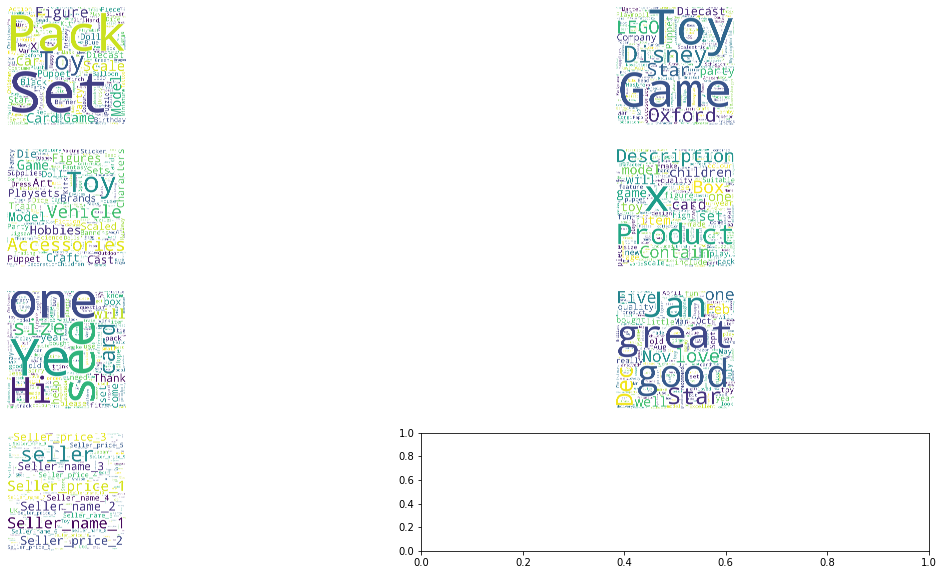

In [51]:
def topicWordCloud(train_df, col, WCwidth, WCheight):
    series = train_df[col].dropna()
    text = " ".join(title for title in series)
    wordcloud = WordCloud(collocations = False, background_color = 'white',
                        width = WCwidth, height = WCheight).generate(text)
    return wordcloud

fg, ax = plt.subplots(4, 2, figsize = (20,10))

for idx ,col in enumerate(textual_cols):
    wordcloud = topicWordCloud(train_df, col, 4000, 4000)
    ax1 = ax[idx//2, idx%2]
    ax1.imshow(wordcloud)
    ax1.axis('off')

## From here we could see the words which appeared very frequently in the features.

### Have a nice day!

### Please do let me know what you think and how could I imrove. 
